# Historical Data

This section illustrates how to retrieve **historical data** for different instruments.

First, the API connection.

In [1]:
import fxcmpy
import pandas as pd
import datetime as dt
con = fxcmpy.fxcmpy(config_file='fxcm.cfg')

## Available Instruments

A list of **instruments** for which historical data is available is returned by `con. get_instruments_for_candles()`.

In [2]:
instruments = con.get_instruments_for_candles()
for i in range(int(len(instruments)/4)):
    print(instruments[i*4:(i+1)*4])
print(instruments[(i+1)*4:])

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF']
['EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD']
['EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'AUD/JPY']
['GBP/AUD', 'USD/CNH', 'FRA40', 'GER30']
['UK100', 'US30', 'USDOLLAR', 'XAU/USD']
['XAG/USD']


## Fetching the Data

In a simple case, the `con.get_candles()` method returns the most recent data points available for a specified `instrument` and `period` value.

In [3]:
con.get_candles('USD/JPY', period='D1')  # daily data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-12-21 22:00:00,113.374,113.312,113.628,113.189,113.422,113.348,113.649,113.211,188634
2017-12-22 22:00:00,113.311,113.254,113.437,113.230,113.347,113.352,113.457,113.264,174379
2017-12-27 22:00:00,113.299,113.332,113.341,113.211,113.320,113.368,113.393,113.232,46062
2017-12-28 22:00:00,113.332,112.843,113.334,112.652,113.368,112.897,113.372,112.674,234357
2017-12-29 22:00:00,112.843,112.641,112.959,112.462,112.897,112.739,112.982,112.484,195779
2018-01-01 22:00:00,112.638,112.586,112.638,112.584,112.732,112.660,112.732,112.660,3
2018-01-02 22:00:00,112.586,112.263,112.782,112.045,112.660,112.317,112.804,112.066,176506
2018-01-03 22:00:00,112.263,112.492,112.597,112.162,112.316,112.528,112.620,112.183,174543
2018-01-04 22:00:00,112.492,112.732,112.854,112.451,112.528,112.768,112.876,112.492,204606


By default, the method returns a `pandas` `DataFrame` object which simplifies the majority of typical analytics and visualizations tasks significantly (see http://pandas.pydata.org).

## Data Frequency

The parameter `period` defines the frequency of the data to be retrieved. Below is a list of all currently available frequencies.

* minutes: `m1`, `m5`, `m15` and `m30`,
* hours: `H1`, `H2`, `H3`, `H4`, `H6` and `H8`,
* one day: `D1`,
* one week: `W1`,
* one month: `M1`.

By default, `con.get_candles()` returns data for the last 10 available periods, depending on the parameter value for `period`.

In [4]:
con.get_candles('EUR/USD', period='M1')  # monthly data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-01-31 22:00:00,1.07960,1.05751,1.08277,1.04925,1.07994,1.05797,1.08301,1.04948,5784569
2017-02-28 21:00:00,1.05751,1.06557,1.09047,1.04937,1.05797,1.06612,1.09077,1.04961,6756270
2017-03-31 21:00:00,1.06557,1.09093,1.09498,1.05683,1.06612,1.09184,1.09521,1.05711,4077696
2017-04-30 21:00:00,1.09093,1.12412,1.12669,1.08380,1.09184,1.12440,1.12704,1.08403,5554385
2017-05-31 21:00:00,1.12412,1.14162,1.14445,1.11178,1.12440,1.14254,1.14467,1.11201,5851248
2017-06-30 21:00:00,1.14162,1.18403,1.18444,1.13112,1.14254,1.18428,1.18473,1.13137,5946183
2017-07-31 21:00:00,1.18403,1.19081,1.20693,1.16610,1.18428,1.19110,1.20716,1.16634,6893224
2017-08-31 21:00:00,1.19081,1.18108,1.20913,1.17160,1.19110,1.18197,1.20937,1.17181,6183348
2017-09-30 21:00:00,1.18108,1.16450,1.18792,1.15731,1.18197,1.16476,1.18810,1.15750,4598301


A number different from 10 can also be defined via the `number` parameter.

In [6]:
con.get_candles('EUR/USD', period='m1', number=5)  # five one-minute bars

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-01-05 21:55:00,1.20276,1.20280,1.20285,1.20269,1.20307,1.20312,1.20317,1.20302,118
2018-01-05 21:56:00,1.20280,1.20275,1.20283,1.20268,1.20312,1.20312,1.20326,1.20307,184
2018-01-05 21:57:00,1.20275,1.20280,1.20282,1.20275,1.20312,1.20317,1.20319,1.20312,58
2018-01-05 21:58:00,1.20280,1.20293,1.20297,1.20280,1.20317,1.20327,1.20329,1.20314,51
2018-01-05 21:59:00,1.20293,1.20263,1.20297,1.20263,1.20327,1.20363,1.20363,1.20327,14


## Time Windows

Alternatively, one can specifiy `start` and `stop` values to specifiy the time window for data retrieval.

In [5]:
start = dt.datetime(2017, 7, 15)
stop = dt.datetime(2017, 8, 1)
con.get_candles('EUR/USD', period='D1',
                start=start, stop=stop)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-07-16 21:00:00,1.14642,1.14721,1.14723,1.14597,1.14702,1.14761,1.14782,1.14686,183
2017-07-17 21:00:00,1.14721,1.14768,1.14859,1.14336,1.14761,1.14803,1.14885,1.14360,210489
2017-07-18 21:00:00,1.14768,1.15514,1.15821,1.14703,1.14803,1.15549,1.15846,1.14728,347712
2017-07-19 21:00:00,1.15514,1.15134,1.15552,1.15089,1.15549,1.15171,1.15603,1.15111,227875
2017-07-20 21:00:00,1.15134,1.16286,1.16575,1.14781,1.15171,1.16325,1.16602,1.14804,422458
2017-07-21 21:00:00,1.16286,1.16622,1.16817,1.16181,1.16325,1.16658,1.16843,1.16205,282128
2017-07-23 21:00:00,1.16622,1.16588,1.16663,1.16539,1.16658,1.16692,1.16738,1.16641,184
2017-07-24 21:00:00,1.16588,1.16378,1.16831,1.16245,1.16692,1.16424,1.16855,1.16271,249547
2017-07-25 21:00:00,1.16378,1.16442,1.17111,1.16293,1.16424,1.16485,1.17136,1.16320,293787


## Data Visualization

The Python ecosystem provides a number of alternatives to **visualize financial time series data**. The standard plotting library is `matplotlib` (see http://matplotlib.org) which is tighly integrated with `pandas` `DataFrame` objects, allowing for efficient visualizations.

In [7]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

Using the `columns` parameter, one can specifiy which data columns are returned. Here, just one column is specified.

In [8]:
data = con.get_candles('EUR/USD', period='m1',
                       columns=['askopen'], number=500)

The following code visualizes the only financial time series in the `DataFrame` object.

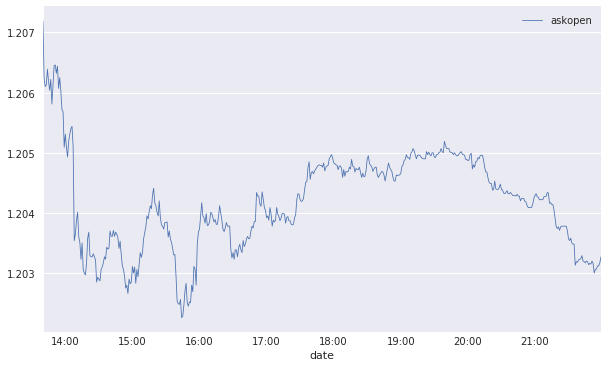

In [9]:
data.plot(figsize=(10, 6), lw=0.8);

Specifying the `columns` parameter to be `asks` (`bids`) returns all columns related to ask (bid) prices.

In [10]:
data = con.get_candles('EUR/USD', period='m1',
                       columns=['asks'], number=50)

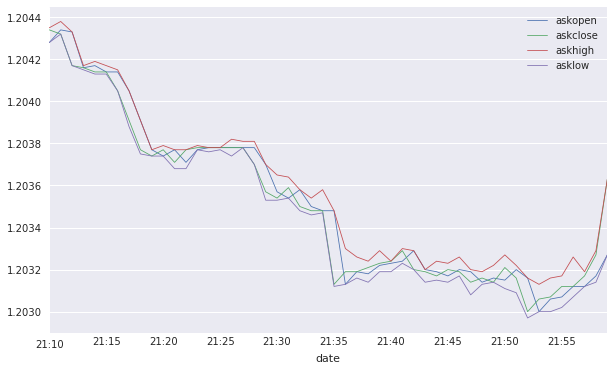

In [11]:
data.plot(figsize=(10, 6), lw=0.8);